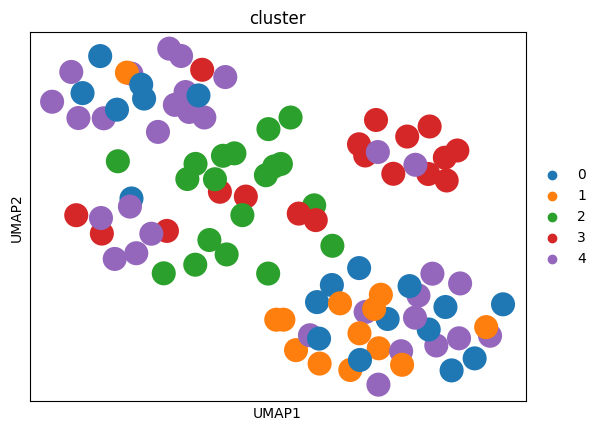

In [ ]:
import ehrapy as ep
import numpy as np
from tslearn.metrics import dtw

import ehrdata as ed

# Create dataset
edata = ed.dt.ehrdata_blobs(
    n_observations=100,
    base_timepoints=20,
    cluster_std=0.7,
    n_centers=5,
    seasonality=True,
    time_shifts=True,
    variable_length=False,
)
R = edata.R


# Define a custom DTW distance function
def custom_dtw_distance(x_dummy, y_dummy):
    # x_dummy and y_dummy are unused - they're just indices from the dummy matrix
    i, j = int(x_dummy[0]), int(y_dummy[0])

    # Get actual time series from R
    dist = 0
    count = 0
    for v in range(R.shape[1]):
        ts_i = R[i, v, :]
        ts_j = R[j, v, :]
        valid_i = ~np.isnan(ts_i)
        valid_j = ~np.isnan(ts_j)
        valid = valid_i & valid_j
        if np.sum(valid) > 3:
            dist += dtw(ts_i[valid].reshape(-1, 1), ts_j[valid].reshape(-1, 1))
            count += 1

    return dist / max(count, 1)


# Calculate neighbors with the custom DTW metric
ep.pp.neighbors(edata, n_neighbors=15, method="umap", metric=custom_dtw_distance)

ep.tl.umap(edata)
ep.pl.umap(edata, color="cluster")